### Practical Questions

### Q1: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Q2: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')

svc_linear.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svc_linear.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))

Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


### Q3: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1.3489971413208706


### Q4: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

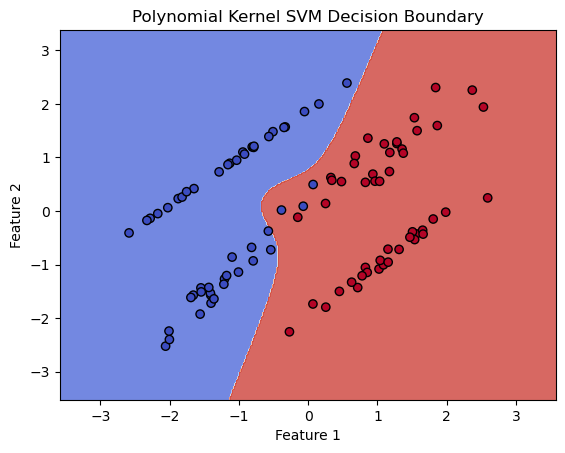

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Train SVM with polynomial kernel
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Polynomial Kernel SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, clf)


### Q5: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


### Q6: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
categories = ['alt.atheism', 'sci.space', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Create a text-processing pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the model
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.87
               precision    recall  f1-score   support

  alt.atheism       0.96      0.79      0.87       173
    sci.space       0.91      0.89      0.90       184
comp.graphics       0.78      0.93      0.85       195

     accuracy                           0.87       552
    macro avg       0.89      0.87      0.87       552
 weighted avg       0.88      0.87      0.87       552



### Q7: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

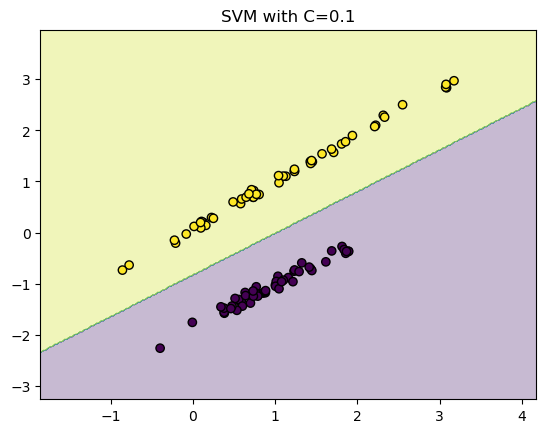

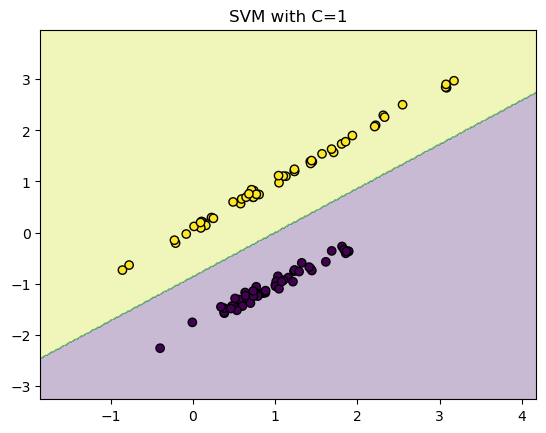

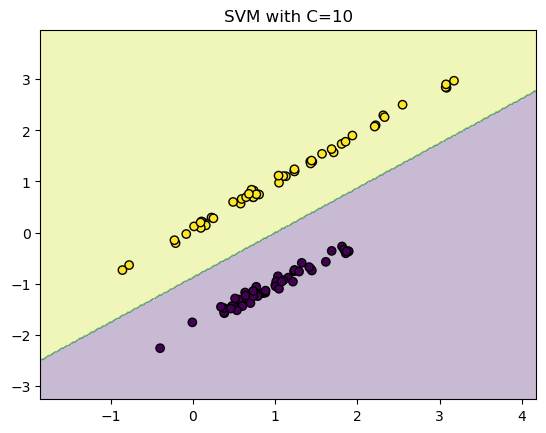

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load data
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)

# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Compare with different C values
for C in [0.1, 1, 10]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y, f"SVM with C={C}")


### Q8: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

In [13]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (digits dataset, which has binary features after binarization)
data = load_digits()
X, y = data.data, data.target

# Convert features to binary (thresholding pixel values)
binarizer = Binarizer(threshold=8)
X_binary = binarizer.fit_transform(X)

# Convert labels to binary (e.g., classify digits as even vs. odd)
y_binary = (y % 2 == 0).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes classifier
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=['Odd', 'Even']))

Accuracy: 0.84
              precision    recall  f1-score   support

         Odd       0.83      0.86      0.84       183
        Even       0.85      0.81      0.83       177

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



### Q9: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without scaling
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = SVC()
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

print("Accuracy (Unscaled):", acc_unscaled)
print("Accuracy (Scaled):", acc_scaled)


Accuracy (Unscaled): 1.0
Accuracy (Scaled): 1.0


### Q10: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standard GaussianNB (no Laplace smoothing)
model1 = GaussianNB()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# Laplace smoothing simulated (not native to GaussianNB; for categorical features only)
print("Accuracy without Laplace Smoothing:", acc1)
print("Laplace smoothing is not applicable to GaussianNB (works with continuous data).")


Accuracy without Laplace Smoothing: 0.958041958041958
Laplace smoothing is not applicable to GaussianNB (works with continuous data).


### Q11: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine
from sklearn.svm import SVC

X, y = load_wine(return_X_y=True)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.961111111111111


### Q12: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without class weights
model1 = SVC()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# With class weights
model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

print("Accuracy without class weighting:", acc1)
print("Accuracy with class weighting:", acc2)


Accuracy without class weighting: 0.924
Accuracy with class weighting: 0.9


### Q13: Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Example data (real project should load from dataset)
emails = ["Free money now!", "Hi, are we still meeting today?", "Win a new car!", "Let's schedule our call"]
labels = [1, 0, 1, 0]  # 1 = spam, 0 = not spam

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.5, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Accuracy (Spam Detection):", accuracy_score(y_test, y_pred))


Accuracy (Spam Detection): 0.0


### Q14: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC()
nb = GaussianNB()

svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb.predict(X_test)))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0


### Q15: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without feature selection
model = GaussianNB()
model.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model.predict(X_test))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, random_state=42)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)
acc_selected = accuracy_score(y_test2, model2.predict(X_test2))

print("Accuracy (All features):", acc_all)
print("Accuracy (Selected features):", acc_selected)


Accuracy (All features): 0.958041958041958
Accuracy (Selected features): 0.951048951048951


### Q16: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


OvR Accuracy: 0.7111111111111111
OvO Accuracy: 0.7777777777777778


### Q17: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for kernel in ['linear', 'poly', 'rbf']:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Kernel = {kernel}, Accuracy = {acc}")


Kernel = linear, Accuracy = 0.958041958041958
Kernel = poly, Accuracy = 0.9440559440559441
Kernel = rbf, Accuracy = 0.951048951048951


### Q18: Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

X, y = load_iris(return_X_y=True)
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(SVC(), X, y, cv=skf)
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average accuracy: 0.9666666666666666


### Q19: Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for prior in [[0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]:
    model = GaussianNB(priors=prior)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Priors = {prior}, Accuracy = {acc}")


Priors = [0.5, 0.5], Accuracy = 0.958041958041958
Priors = [0.3, 0.7], Accuracy = 0.958041958041958
Priors = [0.7, 0.3], Accuracy = 0.951048951048951


### Q20: Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train with all features
model_full = SVC()
model_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, model_full.predict(X_test))

# Recursive Feature Elimination
rfe = RFE(estimator=SVC(kernel="linear"), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

model_rfe = SVC()
model_rfe.fit(X_train_rfe, y_train)
acc_rfe = accuracy_score(y_test, model_rfe.predict(X_test_rfe))

print("Accuracy (All features):", acc_full)
print("Accuracy (RFE-selected features):", acc_rfe)


Accuracy (All features): 0.951048951048951
Accuracy (RFE-selected features): 0.958041958041958


### Q21: Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Q22: Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)

loss = log_loss(y_test, y_proba)
print("Log Loss:", loss)


Log Loss: 0.5041791651287795


### Q23: Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

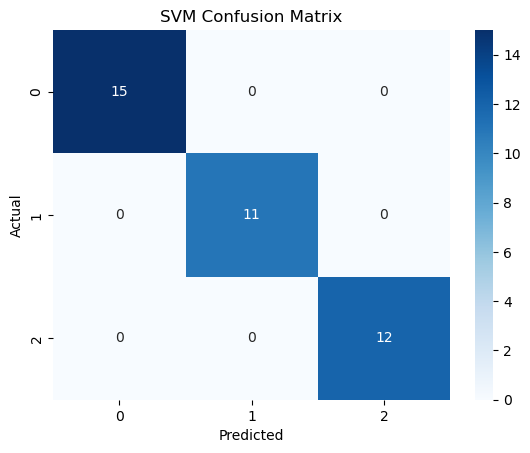

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Q24: Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (SVR):", mae)


Mean Absolute Error (SVR): 0.8674205743031627


### Q25: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)


ROC-AUC Score: 0.9935497295047857


### Q26: Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

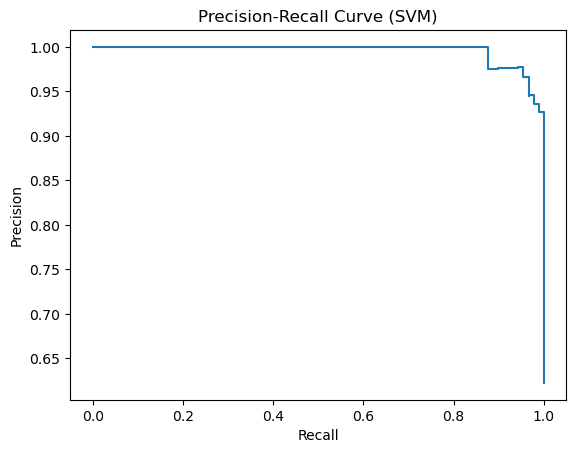

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve (SVM)")
plt.show()
